1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

с intercept

In [1]:
import numpy  as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
import matplotlib.pyplot as plt
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [3]:
n = len(ks)
b1 = (np.mean(zp*ks)-np.mean(zp)*np.mean(ks))/(np.mean(zp**2) - np.mean(zp)**2)
b1

2.620538882402765

In [4]:
b0 = np.mean(ks)-b1*np.mean(zp)
b0

444.1773573243596

In [5]:
y_pred = b0 + b1 * zp
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

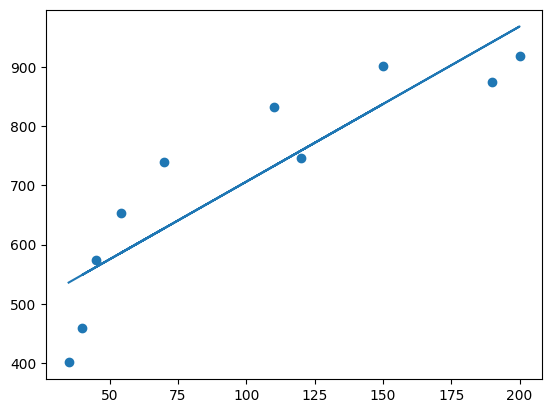

In [6]:
plt.scatter(zp, ks)
plt.plot(zp, y_pred)

In [7]:
mse_ = np.sum(((b0 + b1 * zp) - ks) ** 2 / n)
mse_

6470.414201176659

In [8]:
mse_ = ((ks - y_pred)**2).sum() / n
mse_

6470.414201176658

без interсept

In [9]:
zp1 = zp.reshape(1, n)
ks1 = ks.reshape(1, n)

In [10]:
b1 = np.dot(np.dot(np.linalg.inv(np.dot(zp1, zp1.T)), zp1), ks1.T)[0][0]
b1

5.889820420132689

In [11]:
y_pred1 = b1 * zp
y_pred1

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

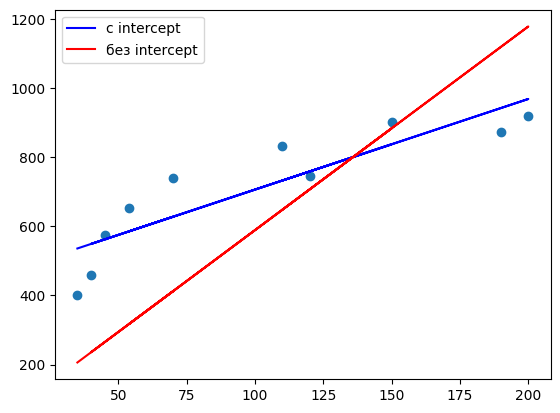

In [12]:
plt.scatter(zp, ks)
plt.plot(zp, y_pred, 'b', label = 'с intercept')
plt.plot(zp, y_pred1, 'r', label = 'без interсept')
plt.legend()

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
alpha = 1e-6
b1 = 0.1
def mse_(b1, y=ks, X=zp, n=10):
    return np.sum((b1 * X - y) ** 2) / n
for i in range(1000):
    fp = (1 / n) * np.sum(2 * (b1 * zp - ks) * zp)
    b1 -= alpha * fp
    if i % 100 == 0:
        print(f'Итерация: {i}, b1 : {b1}, mse: {mse_(b1) }')

Итерация: 0, b1 : 0.25952808000000005, mse: 493237.7212546963
Итерация: 100, b1 : 5.54537842245223, mse: 58151.31823171113
Итерация: 200, b1 : 5.868748638669329, mse: 56522.97550129376
Итерация: 300, b1 : 5.888531320728348, mse: 56516.88130936019
Итерация: 400, b1 : 5.8897415574471985, mse: 56516.85850140053
Итерация: 500, b1 : 5.889815595583751, mse: 56516.858416040064
Итерация: 600, b1 : 5.889820124983314, mse: 56516.85841572062
Итерация: 700, b1 : 5.889820402076462, mse: 56516.85841571941
Итерация: 800, b1 : 5.88982041902807, mse: 56516.8584157194
Итерация: 900, b1 : 5.889820420065112, mse: 56516.85841571941


In [15]:
y_pred2 = b1 * zp
y_pred2

array([ 206.1437147 ,  265.04191891, 1119.06587982, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

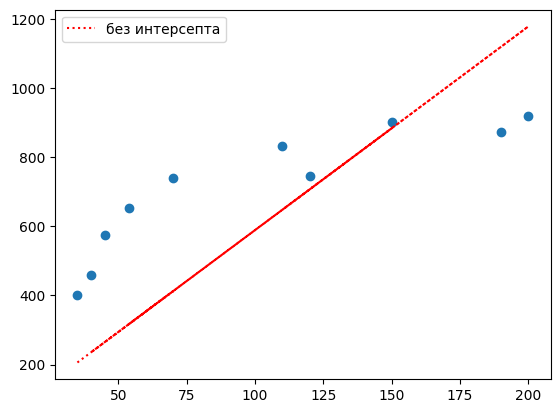

In [16]:
plt.scatter(zp, ks)
plt.plot(zp, y_pred2, 'r:', label = 'без интерсепта')
plt.legend()

3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации)

In [17]:
alpha = 5e-5

b0 = 0.1
b1 = 0.1

def mse_(b0, b1, y = ks, X = zp, n = 10):
    return np.sum((b0 + b1 * X - y) ** 2) / n
for i in range(1000000):
    y_pred3 = b0 + b1 * zp
    b0 -=alpha * (2 / n) * np.sum((y_pred3 - ks))
    b1 -=alpha * (2 / n) * np.sum((y_pred3 - ks)*zp)
    if i % 100000 == 0:
        print(f"Итерация: {i}, b1 : {b1}, b0 : {b0}, mse: {mse_(b0,b1)}")

Итерация: 0, b1 : 8.07539, b0 : 0.169966, mse: 122360.8044853729
Итерация: 100000, b1 : 2.8791831426087984, b0 : 409.03758503899854, mse: 6783.640544683958
Итерация: 200000, b1 : 2.641007845630212, b0 : 441.39641524523927, mse: 6472.375953981324
Итерация: 300000, b1 : 2.6221587847940984, b0 : 443.9572751113981, mse: 6470.426487736031
Итерация: 400000, b1 : 2.6206670805791092, b0 : 444.1599401401525, mse: 6470.414278128017
Итерация: 500000, b1 : 2.6205490279352976, b0 : 444.1759789380671, mse: 6470.414201658608
Итерация: 600000, b1 : 2.6205396853146192, b0 : 444.177248239628, mse: 6470.414201179677
Итерация: 700000, b1 : 2.620538945944757, b0 : 444.1773486914554, mse: 6470.414201176677
Итерация: 800000, b1 : 2.6205388874314473, b0 : 444.17735664115577, mse: 6470.41420117666
Итерация: 900000, b1 : 2.620538882800784, b0 : 444.1773572702843, mse: 6470.41420117666
